## 3D Convex Hull

#### Preparation

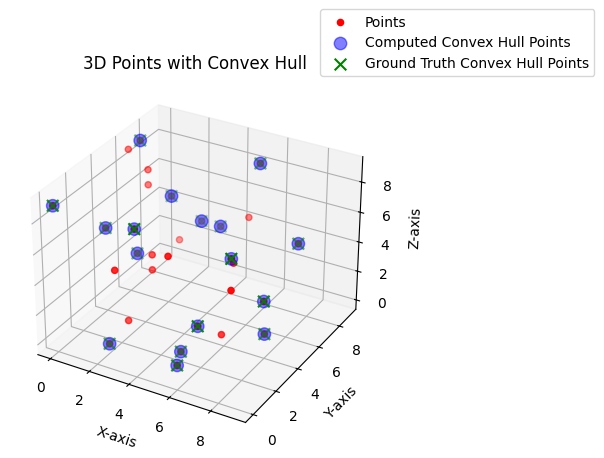

In [1]:
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
from convex_hull_3d import generate_random_points
import numpy as np

def compute_convex_hull_with_scipy(points):
        """使用scipy.spatial.ConvexHull计算凸包"""
        convex_hull = ConvexHull(points)
        hull_points = [points[i] for i in convex_hull.vertices]
        return np.array(hull_points)

def plot_points(points, hull_points=None, show_gt=False):
    """Visualization of 3D points and convex hull"""
    if points is None or len(points) == 0:
        raise ValueError("No points to plot")
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")

    ax.scatter(points[:, 0], points[:, 1], points[:, 2], color="red", label="Points")

    if hull_points is not None and len(hull_points) > 0:
        ax.scatter(
            hull_points[:, 0],
            hull_points[:, 1],
            hull_points[:, 2],
            color="blue",
            alpha=0.5,
            label="Computed Convex Hull Points",
            s=80,
            marker="o",
        )
    
    if show_gt:
        gt_points = compute_convex_hull_with_scipy(points)
        ax.scatter(
            gt_points[:, 0],
            gt_points[:, 1],
            gt_points[:, 2],
            color="green",
            label="Ground Truth Convex Hull Points",
            marker='x',
            s=70)

    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    ax.set_zlabel("Z-axis")
    ax.set_title("3D Points with Convex Hull")
    plt.legend(bbox_to_anchor=(1.6, 1.2), loc='upper right')
    plt.show()
        
points = generate_random_points(30)
hull = compute_convex_hull_with_scipy(points)
plot_points(points, hull, show_gt=True)

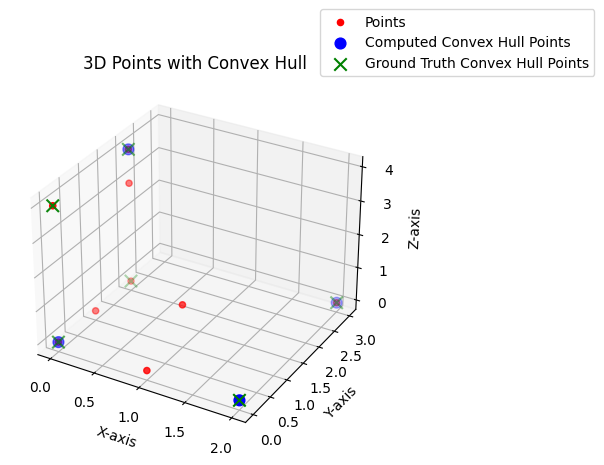

In [1]:
from convex_hull_3d import *

points = points = np.array([
[0, 0, 0], [1, 0, 0], [0, 1, 0], [0, 0, 4], [1, 1, 1], 
[2, 0, 0], [0, 2, 0], [2, 3, 0], [0, 2, 3], [0, 2, 4]
])
hull2 = quickhull_algo(points)
plot_points(points, hull2, True)

#### Paper

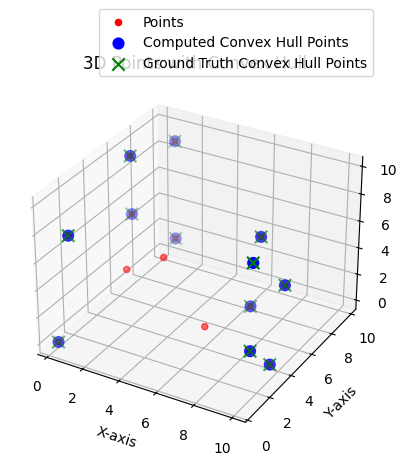

In [1]:
from quickhull import *
points = generate_random_points(15)
hull = quickhull_3d(points)
plot_points(points, hull, True)

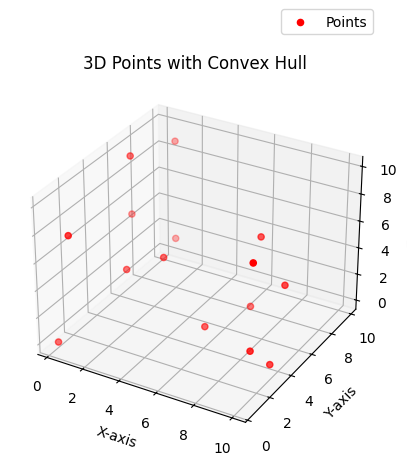

In [3]:
plot_points(points)

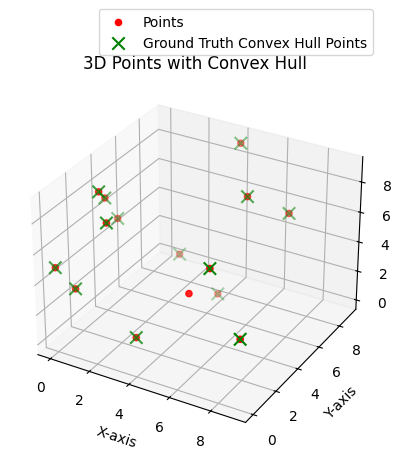

In [8]:
plot_points(points, show_gt=True)

#### QuickHull Algo

In [1]:
import numpy as np  
from convex_hull_3d import plot_points

# 计算两个向量的叉积  
def cross_product(v1, v2):  
    return np.array([v1[1]*v2[2] - v1[2]*v2[1],  
                     v1[2]*v2[0] - v1[0]*v2[2],  
                     v1[0]*v2[1] - v1[1]*v2[0]])  

# 计算三个点确定的平面的法向量  
def normal_vector(p1, p2, p3):  
    v1 = p2 - p1  
    v2 = p3 - p1  
    return cross_product(v1, v2)  

# 计算点到平面的距离  
def point_to_plane_distance(point, plane_point, normal):  
    return np.dot(normal, point - plane_point)  

# Quickhull 主函数  
def quickhull(points):  
    # 寻找凸包的初始极端点  
    p1 = min(points, key=lambda point: point[0])  
    p2 = max(points, key=lambda point: point[0])  
    
    # 将点集分为两部分  
    left_set = []  
    right_set = []  
    normal = normal_vector(p1, p2, p1 + np.array([0,0,1]))  
    for point in points:  
        if point_to_plane_distance(point, p1, normal) > 0:  
            left_set.append(point)  
        elif point_to_plane_distance(point, p1, normal) < 0:  
            right_set.append(point)  
    
    hull = [p1, p2]  
    find_hull(hull, left_set, p1, p2)  
    find_hull(hull, right_set, p2, p1)  
    
    return np.array(hull)  

def find_hull(hull, points, p1, p2):  
    if not points:  
        return  
    
    # 找到点集中距离线段 p1-p2 最远的点  
    farthest_point = max(points, key=lambda point: np.linalg.norm(np.cross(point - p1, point - p2)))  
    
    hull.append(farthest_point)  
    
    # 划分点集  
    new_set1 = []  
    new_set2 = []  
    
    normal1 = normal_vector(p1, farthest_point, p1 + np.array([0,0,1]))  
    normal2 = normal_vector(farthest_point, p2, farthest_point + np.array([0,0,1]))  
    
    for point in points:  
        if point_to_plane_distance(point, p1, normal1) > 0:  
            new_set1.append(point)  
        elif point_to_plane_distance(point, farthest_point, normal2) > 0:  
            new_set2.append(point)  
    
    find_hull(hull, new_set1, p1, farthest_point)  
    find_hull(hull, new_set2, farthest_point, p2)  

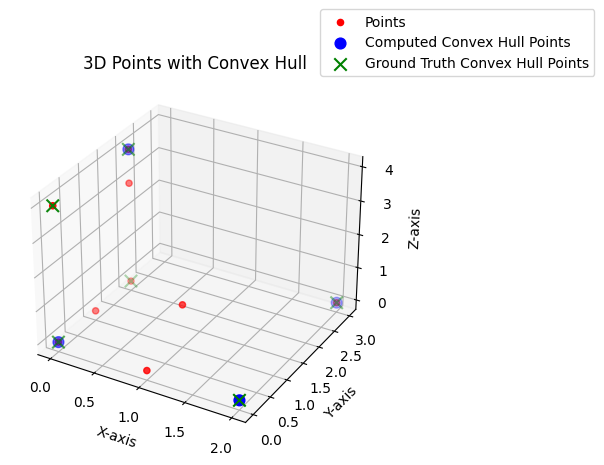

In [2]:
points = np.array([
[0, 0, 0], [1, 0, 0], [0, 1, 0], [0, 0, 4], [1, 1, 1], 
[2, 0, 0], [0, 2, 0], [2, 3, 0], [0, 2, 3], [0, 2, 4]
])
hull_points = quickhull(points)  
plot_points(points, hull_points, True)

#### Incremental Algo

In [ ]:
import numpy as np
from convex_hull_3d import *


def cross_product(a, b):
    """Return the cross product of vectors a and b."""
    return np.cross(a, b)

def dot_product(a, b):
    """Return the dot product of vectors a and b."""
    return np.dot(a, b)

def vector_subtract(a, b):
    """Subtract vector b from vector a."""
    return a - b

def norm(v):
    """Return the norm (length) of vector v."""
    return np.linalg.norm(v)

def point_to_plane_distance(point, plane_point, plane_normal):
    """Calculate the signed distance from a point to a plane."""
    return np.dot(plane_normal, point - plane_point) / norm(plane_normal)

def is_point_above_plane(point, plane_point, plane_normal):
    """Check if a point is above a plane defined by a point and a normal vector."""
    return point_to_plane_distance(point, plane_point, plane_normal) > 0

def find_initial_tetrahedron(points):
    """Find an initial tetrahedron from the given points."""
    simplex = [points[0]]
    # Select a second point farthest from the first point
    distances = np.linalg.norm(points - points[0], axis=1)
    second_point = int(np.argmax(distances))
    simplex.append(points[second_point])
    # Select a third point that forms a plane with the first two points
    normals = np.cross(points - points[0], points[second_point] - points[0])
    norms = np.linalg.norm(normals, axis=1)
    third_point = int(np.argmax(norms))
    simplex.append(points[third_point])
    
    # Select a fourth point that forms a non-coplanar tetrahedron
    volumes = np.dot(points - points[0], normals[third_point])
    fourth_point = int(np.argmax(np.abs(volumes)))
    simplex.append(points[fourth_point])
    
    return np.array(simplex), [[0, second_point, third_point], [0, second_point, fourth_point], [0, third_point, fourth_point], [second_point, third_point, fourth_point]]

def update_hull(hull_faces, new_point, new_point_index, points):
    """Update the convex hull with a new point by finding visible faces and replacing them."""
    visible_faces = []
    horizon_edges = []
    # Find faces visible from the new point
    for i, (v0, v1, v2) in enumerate(hull_faces):
        face_points = np.array([points[v0], points[v1], points[v2]])
        normal = cross_product(face_points[1] - face_points[0], face_points[2] - face_points[0])
        
        if is_point_above_plane(new_point, face_points[0], normal):
            visible_faces.append(i)
            # Collect horizon edges (edges shared between visible and non-visible faces)
            horizon_edges.extend([(v0, v1), (v1, v2), (v2, v0)])
    
    # Remove visible faces from the hull
    hull_faces = [f for i, f in enumerate(hull_faces) if i not in visible_faces]
    
    # Add new faces connecting the new point to the horizon edges
    unique_edges = set([tuple(sorted(edge)) for edge in horizon_edges if horizon_edges.count(edge) == 1])
    
    # new_point_index = len(points)  # The index of the new point in the original array
    for edge in unique_edges:
        v0, v1 = edge
        hull_faces.append([v0, v1, new_point_index])
    
    return hull_faces

def incremental_convex_hull_3d(points):
    """Compute the convex hull of a set of 3D points using an incremental algorithm."""
    num_points = len(points)
    points = np.array(sorted(points, key=lambda x: x[0]))
    # Start with an initial tetrahedron
    tetrahedron, tetrahedron_indices = find_initial_tetrahedron(points)
    hull_faces = tetrahedron_indices
    # Incrementally add points and update the hull
    for i in range(num_points):
        new_point = points[i]
        hull_faces = update_hull(hull_faces, new_point, i, points)
    
    # Collect the vertices of the final convex hull
    hull_vertices = set([v for face in hull_faces for v in face])
    
    return np.array(list(hull_vertices))

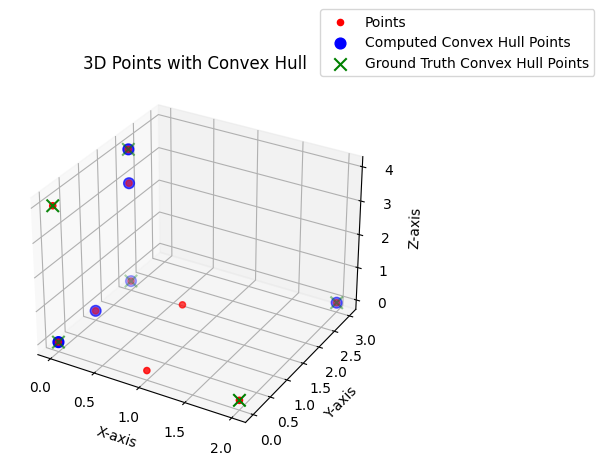

In [3]:
points = np.array([
[0, 0, 0], [1, 0, 0], [0, 1, 0], [0, 0, 4], [1, 1, 1], 
[2, 0, 0], [0, 2, 0], [2, 3, 0], [0, 2, 3], [0, 2, 4]
])
hull_points = incremental_convex_hull_3d(points)
plot_points(points, points[hull_points], True)

#### QuickHull2

In [24]:
import math

class Point:
    def __init__(self, x=0, y=0, z=0):
        self.x = x
        self.y = y
        self.z = z

    def __lt__(self, other):
        if self.x != other.x:
            return self.x < other.x
        if self.y != other.y:
            return self.y < other.y
        return self.z < other.z

class Face:
    def __init__(self, a, b, c):
        self.a = a
        self.b = b
        self.c = c

def cross_product(A, B, C):
    AB = Point(B.x - A.x, B.y - A.y, B.z - A.z)
    AC = Point(C.x - A.x, C.y - A.y, C.z - A.z)
    return Point(AB.y * AC.z - AB.z * AC.y,
                 AB.z * AC.x - AB.x * AC.z,
                 AB.x * AC.y - AB.y * AC.x)

def point_to_plane_distance(A, B, C, P):
    normal = cross_product(A, B, C)
    return abs(normal.x * (P.x - A.x) + normal.y * (P.y - A.y) + normal.z * (P.z - A.z)) / \
           (math.sqrt(normal.x**2 + normal.y**2 + normal.z**2) + 1e-15)

def signed_distance_to_plane(A, B, C, P):
    normal = cross_product(A, B, C)
    return normal.x * (P.x - A.x) + normal.y * (P.y - A.y) + normal.z * (P.z - A.z)

def find_furthest_point(points, face):
    max_distance = -1
    furthest_point = Point()

    for p in points:
        distance = point_to_plane_distance(face.a, face.b, face.c, p)
        if distance > max_distance:
            max_distance = distance
            furthest_point = p

    return furthest_point

def quick_hull_recursive(hull, points, face):
    furthest_point = find_furthest_point(points, face)

    if point_to_plane_distance(face.a, face.b, face.c, furthest_point) < 1e-9:
        hull.add(face.a)
        hull.add(face.b)
        hull.add(face.c)
        return

    left_of_ab = []
    left_of_bc = []
    left_of_ca = []

    for p in points:
        if signed_distance_to_plane(face.a, face.b, furthest_point, p) > 0:
            left_of_ab.append(p)
        if signed_distance_to_plane(face.b, face.c, furthest_point, p) > 0:
            left_of_bc.append(p)
        if signed_distance_to_plane(face.c, face.a, furthest_point, p) > 0:
            left_of_ca.append(p)

    quick_hull_recursive(hull, left_of_ab, Face(face.a, face.b, furthest_point))
    quick_hull_recursive(hull, left_of_bc, Face(face.b, face.c, furthest_point))
    quick_hull_recursive(hull, left_of_ca, Face(face.c, face.a, furthest_point))

def quick_hull(points):
    hull = set()

    min_x = min(points, key=lambda p: p.x)
    max_x = max(points, key=lambda p: p.x)
    min_y = min(points, key=lambda p: p.y)
    max_y = max(points, key=lambda p: p.y)
    min_z = min(points, key=lambda p: p.z)
    max_z = max(points, key=lambda p: p.z)

    initial_face = Face(min_x, max_x, max_y)

    quick_hull_recursive(hull, points, initial_face)

    return hull

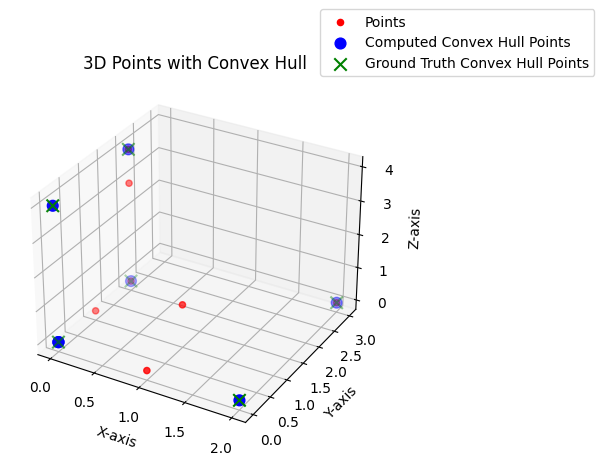

In [25]:
points_array = np.array([
    [0, 0, 0], [1, 0, 0], [0, 1, 0], [0, 0, 4], [1, 1, 1], 
    [2, 0, 0], [0, 2, 0], [2, 3, 0], [0, 2, 3], [0, 2, 4]
])
# from convex_hull_3d import generate_random_points, plot_points
# points_array = generate_random_points(10)
# print(points_array)
points = [Point(p[0], p[1], p[2]) for p in points_array.tolist()]
convex_hull = quick_hull(points)
hull_array = np.array([[p.x, p.y, p.z] for p in convex_hull])
plot_points(points_array, hull_array, True)